<a href="https://colab.research.google.com/github/hahwang0309/test/blob/main/search_connected_nodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## "generating_statutory_network.ipynb"의 결과로 생성된 G("/content/drive/My Drive/RegTech(2023)/Statutory_Database/my_graph.graphml")를 불러와서 특정 노드 기반 서비그래프 탐색 및 시각화

In [ ]:
import pandas as pd
!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

In [ ]:
# [FN : search_connected_nodes]
# 특정 노드와 연결된 노드 및 서브그래프 탐색

def search_connected_nodes(G, node_names, degree=1):
    subgraph_nodes = set()
    for node_name in node_names:
        if node_name not in G:
            print(f"노드 '{node_name}'은(는) 네트워크에 존재하지 않습니다.")
            continue

        ego_net = nx.ego_graph(G, node_name, radius=degree)
        subgraph_nodes.update(ego_net.nodes())

    subgraph = G.subgraph(subgraph_nodes)
    edge_list = pd.DataFrame(list(subgraph.edges()), columns=['From', 'To'])
    return edge_list

In [ ]:
# [FN : save_edge_list_to_excel]
# search_connected_nodes의 결과물인 에지리스트를 엑셀 파일로 저장

def save_edge_list_to_excel(edge_list_df, file_path):
    # 엑셀 파일로 저장
    edge_list_df.to_excel(file_path, index=False)

In [ ]:
# [FN : visualize_searched_network]
# search_connected_nodes의 결과물인 edge_list를 그래프 시각화

def visualize_searched_network(edge_list_df):
    # 네트워크X 그래프 초기화
    G = nx.Graph()

    # 데이터프레임에서 에지 리스트를 튜플 형태로 추출
    edges = [(row['From'], row['To']) for index, row in edge_list_df.iterrows()]

    # 에지 리스트를 그래프에 추가
    G.add_edges_from(edges)

    # 레이아웃 계산, spring_layout 사용
    pos = nx.spring_layout(G, k=0.15, iterations=20)  # k와 iterations는 조절 가능

    # 그래프 시각화
    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', alpha=1, node_size=50, edge_color='#D3D3D3', linewidths=1, font_size=10, font_weight='bold')
    plt.show()


    ### 노드 이름을 디코딩하도록 코드 추가 !!! ###


In [ ]:
# 그래프 불러오기
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/RegTech(2023)/Statutory_Database/my_graph.graphml'
G = nx.read_graphml(file_path)

Mounted at /content/drive


In [ ]:
# Count Number of Connected Networks
connected_components = list(nx.connected_components(G))

# 연결된 컴포넌트의 수를 출력
number_of_connected_components = len(connected_components)
print("연결된 네트워크의 수:", number_of_connected_components)

연결된 네트워크의 수: 33834


In [ ]:
# 연결된 컴포넌트의 크기 계산
component_sizes = [len(c) for c in nx.connected_components(G)]

# 밀도곡선 그리기
plt.figure(figsize=(10, 6))
sns.kdeplot(component_sizes, bw_adjust=0.5, fill=True)
plt.title('연결된 컴포넌트 크기의 밀도 추정')
plt.xlabel('컴포넌트 크기 (노드 개수)')
plt.ylabel('밀도')
plt.show()

In [ ]:
max(component_sizes)

248062

# Test

In [ ]:
# G로부터 임의의 노드 출력
import random

node_names = random.sample(G.nodes(), 3)

print(node_names)

['LAW-000361-0014_6-001', 'LAW-000481-0040-002', 'ATB-000231-00901']


<ipython-input-11-5211895b9cd7>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  node_names = random.sample(G.nodes(), 3)


In [ ]:
# search_connected_nodes 함수 테스트
edge_list = search_connected_nodes(G, node_names,2)
print(edge_list)

                     From                     To
0     LAW-003318-0012-001  LAW-002403-0013_3-003
1     LAW-002403-0065-000  LAW-002403-0013_3-003
2     LAW-000361-0010-000  LAW-002403-0013_3-003
3   LAW-000361-0014_4-003  LAW-002403-0013_3-003
4     LAW-000231-0020-006    LAW-000008-0025-001
5     LAW-000231-0020-006       ATB-000231-00901
6     LAW-000008-0025-001    LAW-000231-0020-005
7        FOM-000361-00404  LAW-000361-0014_6-001
8     LAW-000481-0040-002    LAW-001984-0030-005
9     LAW-000481-0040-002       FOM-000481-04301
10    LAW-000231-0020-005       ATB-000231-00901
11    LAW-002403-0063-000  LAW-002403-0013_3-003
12  LAW-002403-0062_3-000  LAW-002403-0013_3-003
13  LAW-000361-0014_4-004  LAW-002403-0013_3-003
14  LAW-000361-0014_6-001  LAW-002403-0013_3-003
15    LAW-000481-0040-000    LAW-001984-0030-005
16    LAW-001984-0030-005  LAW-001984-0006_2-001
17    LAW-001984-0030-005    LAW-000481-0040-003


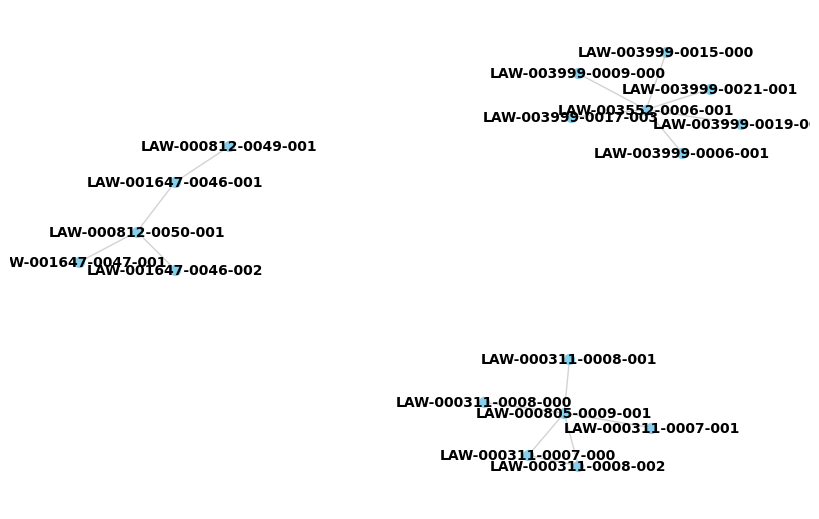

In [ ]:
# visualize_searched_network 함수 테스트
visualize_searched_network(edge_list)

# [예제 1] 탄소중립녹색성장 법령 네트워크 추출

In [ ]:
# 특정 패턴으로 시작하는 노드를 찾기
patterns = ["LAW-000710", "LAW-000479"] # 기후위기 대응을 위한 탄소중립ㆍ녹색성장 기본법과 시행령
filtered_nodes = [node for node in G.nodes() if any(node.startswith(pattern) for pattern in patterns)]

print("Filtered Nodes:", filtered_nodes)

Filtered Nodes: ['LAW-000710-0004-000', 'LAW-000710-0014-000', 'LAW-000479-0001_2-000', 'LAW-000479-0003-000', 'LAW-000479-0002-000', 'LAW-000479-0007-000', 'LAW-000479-0005-000', 'LAW-000479-0006-000', 'LAW-000479-0008-000', 'LAW-000479-0010-000', 'LAW-000479-0015-000', 'LAW-000479-0016-000', 'LAW-000479-0017-000', 'LAW-000479-0019-000', 'LAW-000479-0022-000', 'LAW-000479-0024-000', 'LAW-000479-0025-000', 'LAW-000479-0026-000', 'LAW-000479-0027-000', 'LAW-000479-0028-000', 'LAW-000479-0029-000', 'LAW-000479-0031-000', 'LAW-000479-0032-000', 'LAW-000479-0033-000', 'LAW-000479-0034-000', 'LAW-000479-0037-000', 'LAW-000479-0038-000', 'LAW-000479-0039-000', 'LAW-000710-0002-000', 'LAW-000710-0003-000', 'LAW-000710-0005-000', 'LAW-000710-0006-000', 'LAW-000710-0007-000', 'LAW-000710-0008-000', 'LAW-000710-0009-000', 'LAW-000710-0010-000', 'LAW-000710-0011_2-000', 'LAW-000710-0011_3-000', 'LAW-000710-0011-000', 'LAW-000710-0011_4-000', 'LAW-000710-0013-000', 'LAW-000710-0012-000', 'LAW-0007

In [ ]:
edge_list = search_connected_nodes(G, filtered_nodes,2)
print(edge_list)

                       From                     To
0       LAW-004053-0010-002    LAW-001940-0036-001
1     LAW-000560-0036_2-001    LAW-001940-0036-001
2     LAW-000560-0036_2-001    LAW-000560-0033-003
3       LAW-000125-0022-002    LAW-001940-0036-001
4       LAW-000626-0047-001    LAW-001940-0036-001
...                     ...                    ...
3757    LAW-000710-0004-000    LAW-001418-0021-002
3758  LAW-001034-0020_2-003    LAW-001367-0009-001
3759  LAW-003046-0013_2-001    LAW-003046-0013-002
3760  LAW-003334-0011_2-000  LAW-000479-0015_2-001
3761    LAW-001367-0009-001    LAW-000479-0026-003

[3762 rows x 2 columns]


In [ ]:
save_edge_list_to_excel(edge_list, "/content/drive/My Drive/AR6 Carbon Neutral Scenarios/statutory_network.xlsx")